# Today's session

In today's session, we will practice with some of the genomics tools that were introduced in the theoretical lectures. In particular, we will see how to work with sequences, align them, and identify motifs. To do this, we will be using `Biopyton`, a comprehensive Python module that allows you to do these and many other things. For a complete tour of `Biopython`, take a look at the [complete tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html).

In the final exercise for this class you will be working on the coronavirus.

# What is Biopython?

The Biopython Project is an international association of developers of freely available Python tools for computational molecular biology.

![Biopython](Media/biopython_logo.png)


The main Biopython releases have lots of functionality, including:

* The ability to parse bioinformatics files into Python utilizable data structures, including support for the following formats:
    - Blast output – both from standalone and WWW Blast
    - Clustalw
    - FASTA
    - GenBank
    - PubMed and Medline
    - ExPASy files, like Enzyme and Prosite
    - SCOP, including ‘dom’ and ‘lin’ files
    - UniGene
    - SwissProt 
* Files in the supported formats can be iterated over record by record or indexed and accessed via a Dictionary interface.
* Code to deal with popular on-line bioinformatics destinations such as:
    - NCBI – Blast, Entrez and PubMed services
    - ExPASy – Swiss-Prot and Prosite entries, as well as Prosite searches 
* Interfaces to common bioinformatics programs such as:
    - Standalone Blast from NCBI
    - Clustalw alignment program
    - EMBOSS command line tools 
* A standard sequence class that deals with sequences, ids on sequences, and sequence features.
* Tools for performing common operations on sequences, such as translation, transcription and weight calculations.
* Code for dealing with alignments, including a standard way to create and deal with substitution matrices.
* Code making it easy to split up parallelizable tasks into separate processes.
* GUI-based programs to do basic sequence manipulations, translations, BLASTing, etc.
* Extensive documentation and help with using the modules, including the tutorial, on-line wiki documentation, the web site, and the mailing list.
* Integration with BioSQL, a sequence database schema also supported by the BioPerl and BioJava projects.

In [2]:
from Bio import SeqIO

In [3]:
records = list(SeqIO.parse('Data/sequence.gb', 'genbank'))
for record in records:
    print(record.description)

Middle East respiratory syndrome-related coronavirus isolate NL13892, complete genome
Middle East respiratory syndrome-related coronavirus isolate NL140455, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/01/human/2020/SWE, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/WH-09/human/2020/CHN, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS0CoV-2/61-TW/human/2020/ NPL, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/NTU01/2020/TWN, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/NTU02/2020/TWN, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-IL2/2020, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CA6/2020, complete genome
Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/Yunnan-01/human/2020/CHN, complete genome
Severe acute re

Human coronavirus OC43 isolate 3582/2006, complete genome
Human coronavirus OC43 isolate 5472/2007, complete genome
Human coronavirus OC43 isolate 12689/2012, complete genome
Human coronavirus OC43 isolate 12691/2012, complete genome
Human coronavirus OC43 isolate 12694/2012, complete genome
Human coronavirus OC43 isolate 229/2005, complete genome
Human coronavirus OC43 isolate 5370/2007, complete genome
Human coronavirus OC43 isolate 5414/2007, complete genome
Human coronavirus OC43 isolate 5442/2007, complete genome
Human coronavirus OC43 isolate 5445/2007, complete genome
Human coronavirus OC43 isolate 5479/2007, complete genome
Human coronavirus OC43 isolate 5484/2007, complete genome
Human coronavirus OC43 isolate 5485/2007, complete genome
Human coronavirus OC43 isolate 5508/2007, complete genome
Human coronavirus OC43 isolate 5517/2007, complete genome
Human coronavirus OC43 isolate 5519/2007, complete genome
Human coronavirus OC43 isolate 5566/2007, complete genome
Human corona

In [4]:
records[0]

SeqRecord(seq=Seq('GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTGCAGAACTC...AAA', IUPACAmbiguousDNA()), id='MG987420.1', name='MG987420', description='Middle East respiratory syndrome-related coronavirus isolate NL13892, complete genome', dbxrefs=[])

In [5]:
records[0].annotations

{'accessions': ['MG987420'],
 'data_file_division': 'VRL',
 'date': '23-FEB-2020',
 'gi': '1386872237',
 'keywords': [''],
 'molecule_type': 'RNA',
 'organism': 'Middle East respiratory syndrome-related coronavirus',
 'references': [Reference(title='Discovery of novel bat betacoronaviruses in south China', ...),
  Reference(title='Direct Submission', ...)],
 'sequence_version': 1,
 'source': 'Middle East respiratory syndrome-related coronavirus (MERS-CoV)',
 'structured_comment': OrderedDict([('Assembly-Data',
               OrderedDict([('Assembly Method', 'Lasergene Seqman v. V7.0'),
                            ('Assembly Name', 'Assembly 1'),
                            ('Sequencing Technology',
                             'Illumina; Sanger dideoxy sequencing')]))]),
 'taxonomy': ['Viruses',
  'ssRNA viruses',
  'ssRNA positive-strand viruses, no DNA stage',
  'Nidovirales',
  'Coronaviridae',
  'Coronavirinae',
  'Betacoronavirus'],
 'topology': 'linear'}

In [8]:
record_dict = SeqIO.to_dict(SeqIO.parse('Data/sequence.gb', 'genbank'))

In [9]:
print(record_dict['MN908947.3'].seq)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

# sjsfnsjns

In [48]:
from Bio import Entrez
Entrez.email = "roger.guimera@urv.cat"  # Always tell NCBI who you are
handle = Entrez.efetch(db="nucleotide", id='MN908947.3', rettype="gb", retmode="text")
patient_rec = SeqIO.read(handle, "genbank")
handle.close()

In [11]:
print(patient_rec)

ID: MN908947.3
Name: MN908947
Description: Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 23
/taxonomy=['Viruses', 'Riboviria', 'Nidovirales', 'Cornidovirineae', 'Coronaviridae', 'Orthocoronavirinae', 'Betacoronavirus', 'Sarbecovirus']
/topology=linear
/keywords=['']
/date=11-FEB-2020
/sequence_version=3
/comment=On Jan 17, 2020 this sequence version replaced MN908947.2.
/references=[Reference(title='A new coronavirus associated with human respiratory disease in China', ...), Reference(title='Direct Submission', ...)]
/data_file_division=VRL
/source=Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
/organism=Severe acute respiratory syndrome coronavirus 2
/structured_comment=OrderedDict([('Assembly-Data', OrderedDict([('Assembly Method', 'Megahit v. V1.1.3'), ('Sequencing Technology', 'Illumina')]))])
/accessions=['MN908947']
/molecule_type=ss-RNA
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', IUPA

In [12]:
print(patient_rec.seq)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [13]:
patient_rec.features
# CDS=coding sequence

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(29903), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(265), strand=1), type="5'UTR"),
 SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene'),
 SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(265), ExactPosition(13468), strand=1), FeatureLocation(ExactPosition(13467), ExactPosition(21555), strand=1)], 'join'), type='CDS', location_operator='join'),
 SeqFeature(FeatureLocation(ExactPosition(21562), ExactPosition(25384), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(21562), ExactPosition(25384), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(25392), ExactPosition(26220), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(25392), ExactPosition(26220), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(26244), ExactPosition(26472), strand=1), type='gene'),
 SeqFeature(Feat

# sgsgsgsg

In [14]:
from Bio.Blast import NCBIWWW

In [7]:
help(NCBIWWW.qblast)

Help on function qblast in module Bio.Blast.NCBIWWW:

qblast(program, database, sequence, url_base='https://blast.ncbi.nlm.nih.gov/Blast.cgi', auto_format=None, composition_based_statistics=None, db_genetic_code=None, endpoints=None, entrez_query='(none)', expect=10.0, filter=None, gapcosts=None, genetic_code=None, hitlist_size=50, i_thresh=None, layout=None, lcase_mask=None, matrix_name=None, nucl_penalty=None, nucl_reward=None, other_advanced=None, perc_ident=None, phi_pattern=None, query_file=None, query_believe_defline=None, query_from=None, query_to=None, searchsp_eff=None, service=None, threshold=None, ungapped_alignment=None, word_size=None, short_query=None, alignments=500, alignment_view=None, descriptions=500, entrez_links_new_window=None, expect_low=None, expect_high=None, format_entrez_query=None, format_object=None, format_type='XML', ncbi_gi=None, results_file=None, show_overview=None, megablast=None, template_type=None, template_length=None)
    BLAST search using NCBI's

In [29]:
%time result_handle = NCBIWWW.qblast("blastn", "nt", record_dict['MN908947.3'].seq)
with open("Files/my_blast.xml", "w") as out_handle:
    out_handle.write(result_handle.read())


CPU times: user 92 ms, sys: 44 ms, total: 136 ms
Wall time: 10min 14s


In [8]:
from Bio.Blast import NCBIXML

In [9]:
result_handle = open("Files/my_blast.xml")
blast_records = list(NCBIXML.parse(result_handle))

![UML diagram of the BlastRecord](Media/BlastRecord.png)

In [10]:
E_VALUE_THRESH = 0.01
print(len(blast_records[0].alignments))
for alignment in blast_records[0].alignments:
    for hsp in alignment.hsps:  # HSPs = high-scoring pairs
        if hsp.expect < E_VALUE_THRESH:
            print("\n****Alignment****")
            print("sequence  :", alignment.title)
            print("length    :", alignment.length)
            print("e value   :", hsp.expect)
            print("identities:", hsp.identities)
            print(hsp.query[0:75] + "...")
            print(hsp.match[0:75] + "...")
            print(hsp.sbjct[0:75] + "...")

50

****Alignment****
sequence  : gi|1798174254|ref|NC_045512.2| Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome >gi|1798172431|gb|MN908947.3| Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
length    : 29903
e value   : 0.0
identities: 29903
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...

****Alignment****
sequence  : gi|1805293633|gb|MT019531.1| Severe acute respiratory syndrome coronavirus 2 isolate BetaCoV/Wuhan/IPBCAMS-WH-03/2019, complete genome
length    : 29899
e value   : 0.0
identities: 29898
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...

***

In [59]:
from Bio import Entrez
Entrez.email = "roger.guimera@urv.cat"  # Always tell NCBI who you are
handle = Entrez.efetch(db="nucleotide", id="MG772933.1", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

In [50]:
record.seq

Seq('ATATTAGGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGT...AAA', IUPACAmbiguousDNA())

In [51]:
seq1 = record.seq
seq2 = patient_rec.seq

In [52]:
from Bio import Align

In [17]:
aligner = Align.PairwiseAligner()
alignments = aligner.align(seq1, seq2)

In [18]:
print(aligner)
print(aligner.algorithm)

Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

Needleman-Wunsch


In [19]:
from Bio.Align import substitution_matrices

/home/rguimera/.local/lib/python3.5/site-packages/Bio/Align/substitution_matrices/__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)


In [18]:
for m in substitution_matrices.load():
    print(m, substitution_matrices.load(m))

BENNER22 #  S.A. Benner, M.A. Cohen, G.H. Gonnet:
#  "Amino acid substitution during functionally constrained divergent evolution
#  of protein sequences".
#  Protein Engineering 7(11): 1323-1332 (1994).
#  Figure 3B.
#  PMID 7700864
     A    C    D    E    F    G    H    I    K    L    M    N    P    Q    R    S    T    V    W    Y
A  2.5 -1.2 -0.2 -0.3 -3.1  0.8 -1.6 -0.4 -1.0 -1.7 -0.8  0.0  0.8 -0.9 -1.2  1.3  1.4  0.4 -5.5 -3.5
C -1.2 12.6 -3.7 -4.3 -0.1 -1.7 -1.5 -2.4 -3.3 -2.6 -2.5 -1.9 -3.1 -3.3 -1.6  0.3 -1.1 -1.7  0.5  0.6
D -0.2 -3.7  4.8  3.9 -5.4  0.7  0.3 -4.0  0.2 -4.9 -3.9  2.4 -1.8  0.6 -1.0  0.1 -0.7 -3.0 -6.4 -3.0
E -0.3 -4.3  3.9  4.6 -5.7  0.5 -0.2 -3.6  1.0 -4.4 -3.4  1.2 -1.7  1.7 -0.1 -0.5 -0.9 -2.7 -6.3 -4.0
F -3.1 -0.1 -5.4 -5.7  7.7 -5.8  0.3  0.5 -5.1  2.2  0.7 -3.5 -3.4 -3.6 -4.3 -2.2 -2.6 -0.1  0.5  5.9
G  0.8 -1.7  0.7  0.5 -5.8  6.2 -2.0 -3.8 -1.0 -4.9 -3.8  0.4 -1.8 -1.4 -0.7  0.6 -0.7 -2.5 -4.5 -4.8
H -1.6 -1.5  0.3 -0.2  0.3 -2.0  6.1 -3.2  0.8 -2.1 

In [19]:
matrix = substitution_matrices.load("SCHNEIDER")
print(matrix)

#  Adrian Schneider, Gina M. Cannarozzi, and Gaston H. Gonnet:
#  "Empirical codon substitution matrix."
#  BMC Bioinformatics 6:134 (2005).
#  Additional File 3.
#  PMID 15927081
      AAA   AAC   AAG   AAT   ACA   ACC   ACG   ACT   AGA   AGC   AGG   AGT   ATA   ATC   ATG   ATT   CAA   CAC   CAG   CAT   CCA   CCC   CCG   CCT   CGA   CGC   CGG   CGT   CTA   CTC   CTG   CTT   GAA   GAC   GAG   GAT   GCA   GCC   GCG   GCT   GGA   GGC   GGG   GGT   GTA   GTC   GTG   GTT   TAA   TAC   TAG   TAT   TCA   TCC   TCG   TCT   TGA   TGC   TGG   TGT   TTA   TTC   TTG   TTT
AAA  11.6  -2.7   9.7  -1.7  -2.7  -6.4  -3.9  -5.6   5.1  -5.0   3.6  -4.2  -6.3 -13.0  -7.1 -11.5   0.4  -6.0  -1.9  -5.3  -8.5 -11.2  -8.9 -10.8   2.1   0.0   1.4   0.2 -10.2 -13.5 -13.0 -12.5  -2.6  -8.5  -5.0  -8.1  -6.3  -9.9  -7.5  -9.0  -7.1 -10.2  -8.2  -9.2  -8.2 -12.5 -11.1 -11.4 -50.0 -14.8 -50.0 -13.8  -7.3 -10.1  -8.4  -9.1 -50.0 -13.0 -13.5 -12.4 -10.7 -18.1 -11.8 -17.2
AAC  -2.7  13.0  -3.3  10.9  -3.5  -0.4  -3.

In [20]:
aligner = Align.PairwiseAligner(matrix=matrix)
alignments = aligner.align(seq1, seq2)

In [21]:
print(aligner)

Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global



In [22]:
print(len(alignments))

OverflowError: number of optimal alignments is larger than 9223372036854775807

In [53]:
aligner = Align.PairwiseAligner()
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
print(aligner)
alignments = aligner.align(seq1, seq2)

Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: -2.000000
  target_internal_open_gap_score: -2.500000
  target_internal_extend_gap_score: -2.500000
  target_left_open_gap_score: -2.500000
  target_left_extend_gap_score: -2.500000
  target_right_open_gap_score: -2.500000
  target_right_extend_gap_score: -2.500000
  query_internal_open_gap_score: -2.500000
  query_internal_extend_gap_score: -2.500000
  query_left_open_gap_score: -2.500000
  query_left_extend_gap_score: -2.500000
  query_right_open_gap_score: -2.500000
  query_right_extend_gap_score: -2.500000
  mode: global



In [54]:
print(alignments[0].score)

19106.5


In [55]:
print(alignments[0])

ATATTA-GGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGACTGTCACTTAGCTGCATGCTTAGTGCACTCACGCAGTTTAATTA-TAATTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCATACCTTGGTTTCGTCCGGGTGTGACCGAGAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGGTCCA-CTCAGTTTGCCTGTTTTACAGGTTCGTGACGTGCTTGTACGTGGCTTTGGAGACTCCGTAGAGGAAG-CTTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTACCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCTGATGCCCGAACTGCACCTCACGGCCATGTTATGGTCGAATTAGTAGCAGAACTCGATGGCATTCAGTATGGTCGTAGTGGTGAGACACTTGGTGTTCTTGTCCCTCATGTAGGAGAGGTACCAGTTGCTTACCGTAAAGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCTTTTGACTTAGGCGACGAGCTTGGTACTGATCCT-ATTGAAGATTTTCAAGAAAATTGGAACACTAAACATGGCAGTGGTGTTACCCGTGAACTCAAGCGTGAGCTTAACGGAGGTGCATACACTCGCTATGTAGACAACAACTTTTGTGGCCCAGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTGGCTCGTGCTGGTAAGGCTTCTTATGC--TTTGTCTGAACAATTGGATTTTATTGACACTAAGAGAGGTGTGTACTGCTGCCGTGAACACGAGCATGAAATTGCTTGGTACACGGAA

In [33]:
import matplotlib.pyplot as plt

In [73]:
def plot_alignment(alma, thin=50):
    plt.figure(figsize=(20, 5))
    nmatch = 0
    for i in range(len(alma)):
        if alma[i] == '|':
            nmatch += 1
        if ((i+1) % thin) == 0:
            plt.plot((i, i), (0, 1), c='g', alpha=((nmatch - 0.25)/thin))
            nmatch = 0
    plt.show()
    return

def plot_alignment2(alma, thin=200):
    plt.figure(figsize=(20, 5))
    nmatch, x, y = 0, [], []
    for i in range(len(alma)):
        if alma[i] == '|':
            nmatch += 1
        if ((i+1) % thin) == 0:
            x.append(i)
            y.append(nmatch/thin)           
            nmatch = 0
    plt.plot(x, y)
    plt.show()
    return  

In [77]:
als2 = str(alignments[0])[:len(str(alignments[0])) // 3]
alma = str(alignments[0])[len(str(alignments[0])) // 3 : 2 * len(str(alignments[0])) // 3]
als1 = str(alignments[0])[2 * len(str(alignments[0])) // 3:]

print(als1[:75])
print(alma[:75])
print(als2[:75])

AT-TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA
||-|.|-|||||.||||||||||||||||||||||||.||||.||||||||||||||||||||||||||||||||
ATATTA-GGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAA


In [69]:
alma.count('|') / len(alma)

0.8812907928304012

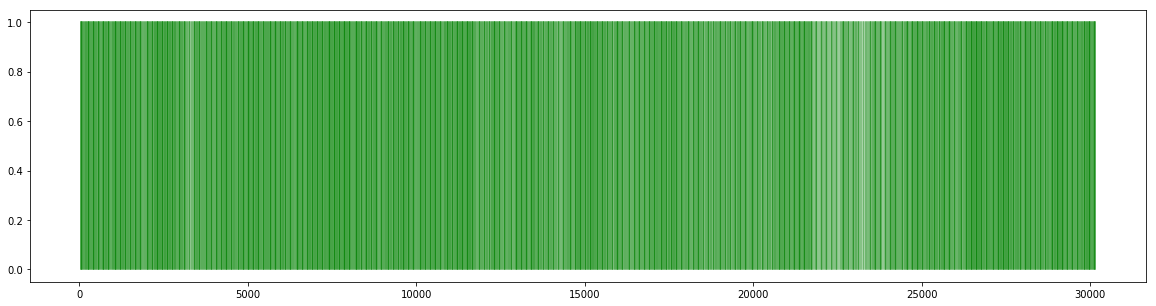

In [74]:
plot_alignment(alma[:])

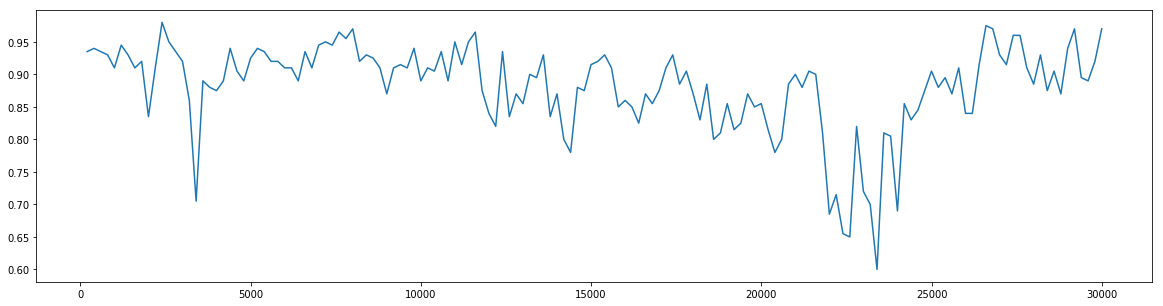

In [75]:
plot_alignment2(alma[:])

In [36]:
print(alignments[0].query[:75])
print(alignments[0].target[:75])
print(alignments[0].score)
#print(alignments[0].path)
#print(alignments[0].aligned)
dir(alignments[0])


ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTA
11676.0


['__class__',
 '__cmp__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_generalized',
 '_format_psl',
 'aligned',
 'format',
 'path',
 'query',
 'score',
 'target']

# Final exercise: The misterious patient

A few weeks ago, a patient was admitted to the hospital where you work. The patient was coughing, and had a fever and difficulty breathing. Your colleagues Oscar and Mariona, from the genomics platform at the hospital, have been able to isolate the whole genome of a virus from the patient, which is thought to be responsible for the disease. **You are expected to identify what the virus is and, thus, provide a diagnosis**. You are also expected to compare the virus' genome with the genome of similar viruses to try to understand how is the disease different from known diseases. 

1. **Open and read sequence of the virus**, which is available as a FASTA file from `Files/patient.fasta`).
2. BLAST manually
3. BLAST using Biopython
4. Open results
5. Features of the closest match
6. Pairwise alignment with other similar